In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)

In [3]:
df = pd.read_excel('2015_brooklyn.xls', header=4)

## The cleaning code is in the file 'cleaning.py'

In [4]:
df = pd.read_csv('most_cleaned_data.csv', index_col=0)

In [5]:
zip_median = df.groupby(['ZIP_CODE']).SALE_PRICE.median().to_dict()
df['zip_median'] = [zip_median[x] for x in df['ZIP_CODE']]
# create another column that codes for whether or not the sale price is above the zip median
df['above_mid'] = np.where(df['SALE_PRICE'] >= df['zip_median'], 1, 0)

In [8]:
df.SALE_PRICE.max()

169000000

In [6]:
df['above_bk_mean'] = np.where(df['SALE_PRICE'] >= df.SALE_PRICE.mean(), 1, 0)

In [7]:
df.describe()

,BOROUGH,BLOCK,LOT,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_SEASON,zip_mean,above_mean,zip_median,above_mid,above_bk_mean
count,15430.0,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,15430.000000,14312.000000,15430.000000,1.543000e+04,15430.000000,1.543000e+04,15430.000000,1.543000e+04,15430.000000,15430.000000
mean,3.0,4215.961568,290.401426,0.160337,11220.132275,2.266494,0.163253,2.437395,2035.040052,2648.159819,1940.974008,1.619831,1.294994e+06,2.519896,1.239024e+06,0.276539,7.511607e+05,0.502852,0.205962
std,0.0,2691.447849,502.541704,0.386039,12.053177,8.346334,2.972073,8.892882,6139.093281,10283.134890,35.876170,0.782693,4.019341e+06,1.099655,6.352152e+05,0.447301,2.690476e+05,0.500008,0.404416
min,3.0,20.000000,1.000000,0.000000,11201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,1.000000,5.019300e+04,1.000000,2.960000e+05,0.000000,2.960000e+05,0.000000,0.000000
25%,3.0,1660.000000,20.000000,0.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1915.000000,1.000000,4.180942e+05,2.000000,6.480097e+05,0.000000,5.025000e+05,0.000000,0.000000
50%,3.0,4193.000000,46.000000,0.000000,11219.000000,1.000000,0.000000,1.000000,1800.000000,1498.500000,1930.000000,1.000000,6.900000e+05,3.000000,9.652831e+05,0.000000,7.372210e+05,1.000000,0.000000
75%,3.0,6590.000000,109.000000,0.000000,11231.000000,2.000000,0.000000,2.000000,2400.000000,2625.000000,1960.000000,2.000000,1.150000e+06,3.000000,1.732101e+06,1.000000,9.300000e+05,1.000000,0.000000
max,3.0,8955.000000,7503.000000,3.000000,11249.000000,338.000000,355.000000,355.000000,270438.000000,366000.000000,2016.000000,4.000000,1.690000e+08,4.000000,2.866907e+06,1.000000,1.525000e+06,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15430 entries, 0 to 25361
Data columns (total 27 columns):
BOROUGH                           15430 non-null int64
NEIGHBORHOOD                      15430 non-null object
BUILDING_CLASS_CATEGORY           15430 non-null object
TAX_CLASS_AT_PRESENT              15430 non-null object
BLOCK                             15430 non-null int64
LOT                               15430 non-null int64
BUILDING_CLASS_AT_PRESENT         15430 non-null object
ADDRESS                           15430 non-null object
APARTMENT_NUMBER                  15430 non-null int64
ZIP_CODE                          15430 non-null int64
RESIDENTIAL_UNITS                 15430 non-null int64
COMMERCIAL_UNITS                  15430 non-null int64
TOTAL_UNITS                       15430 non-null int64
LAND_SQUARE_FEET                  15430 non-null int64
GROSS_SQUARE_FEET                 15430 non-null int64
YEAR_BUILT                        14312 non-null float64
TAX_

In [7]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'SALE_SEASON', 'zip_mean', 'above_mean', 'year'],
      dtype='object')

In [8]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,SALE_SEASON,zip_mean,above_mean,year
0,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,22,A5,8647 15TH AVENUE,0,11228,1,0,1,1547,1428,1930.0,1,A5,758000,2015-03-31,2,877809.302158,0,"(1921.0, 1940.0]"
1,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6361,17,A5,55 BAY 10TH STREET,0,11228,1,0,1,1933,1660,1930.0,1,A5,778000,2015-06-15,3,877809.302158,0,"(1921.0, 1940.0]"
3,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6372,48,S1,1906 86TH STREET,0,11214,1,1,2,1900,2090,1931.0,1,S1,1365000,2015-05-29,2,886411.862069,1,"(1921.0, 1940.0]"
4,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6373,73,A1,50 BAY 23RD STREET,0,11214,1,0,1,2417,1672,1930.0,1,A1,750000,2015-12-17,1,886411.862069,0,"(1921.0, 1940.0]"
5,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,49,S1,1964 86TH STREET,0,11214,1,1,2,1725,2112,1925.0,1,S1,1470000,2015-05-06,2,886411.862069,1,"(1921.0, 1940.0]"


## Data visualization

In [14]:
sns.set_style('darkgrid')

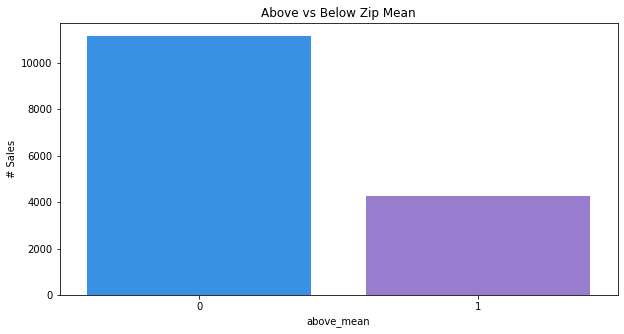

In [12]:
plt.figure(figsize = (10,5))
sns.countplot(df['above_mean'], palette= ['dodgerblue','mediumpurple'])
plt.title('Above vs Below Zip Mean')
plt.ylabel('# Sales')
plt.show()

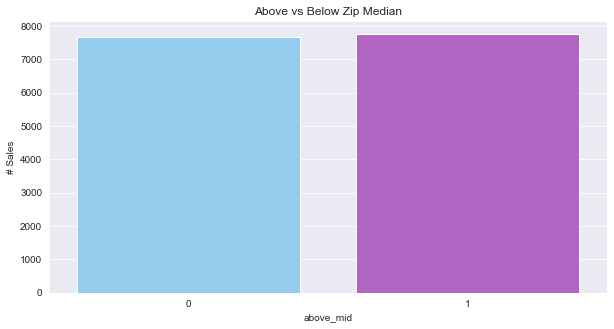

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(df['above_mid'], palette= ['lightskyblue','mediumorchid'])
plt.title('Above vs Below Zip Median')
plt.ylabel('# Sales')
plt.show()

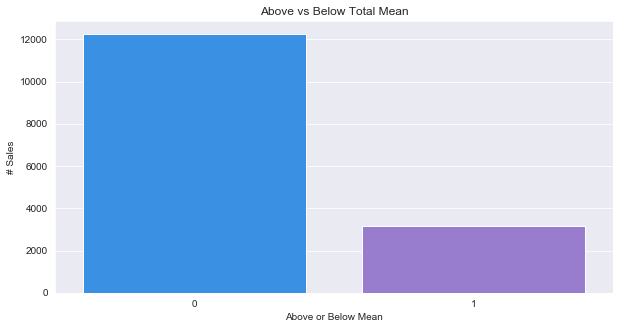

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(df['above_bk_mean'], palette= ['dodgerblue','mediumpurple'])
plt.title('Above vs Below Total Mean')
plt.ylabel('# Sales')
plt.xlabel('Above or Below Mean')
plt.show()

In [31]:
print('Median Variable')
print(df.groupby(['above_mid']).above_mid.count())

Median Variable
above_mid
0    7671
1    7759
Name: above_mid, dtype: int64


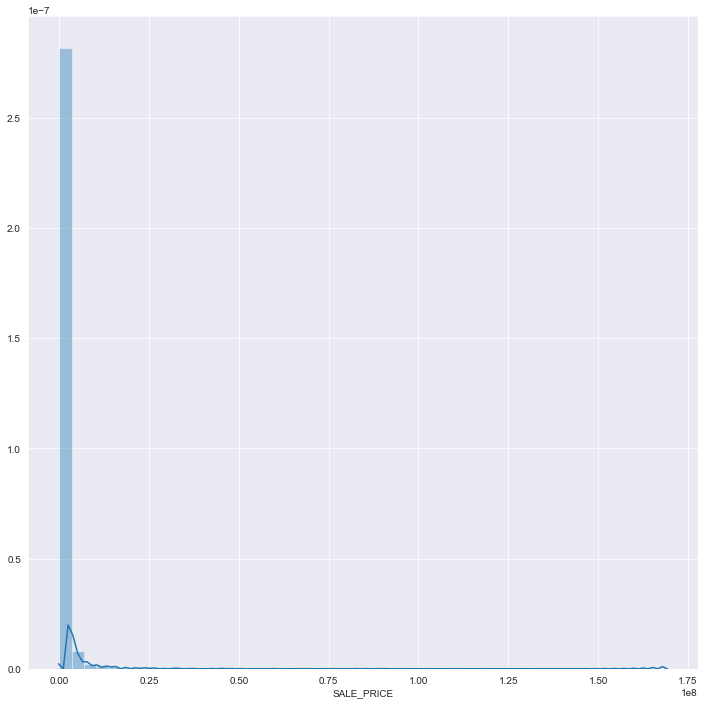

In [147]:
plt.figure(figsize=(12,12))
sns.distplot(a=df['SALE_PRICE']);

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


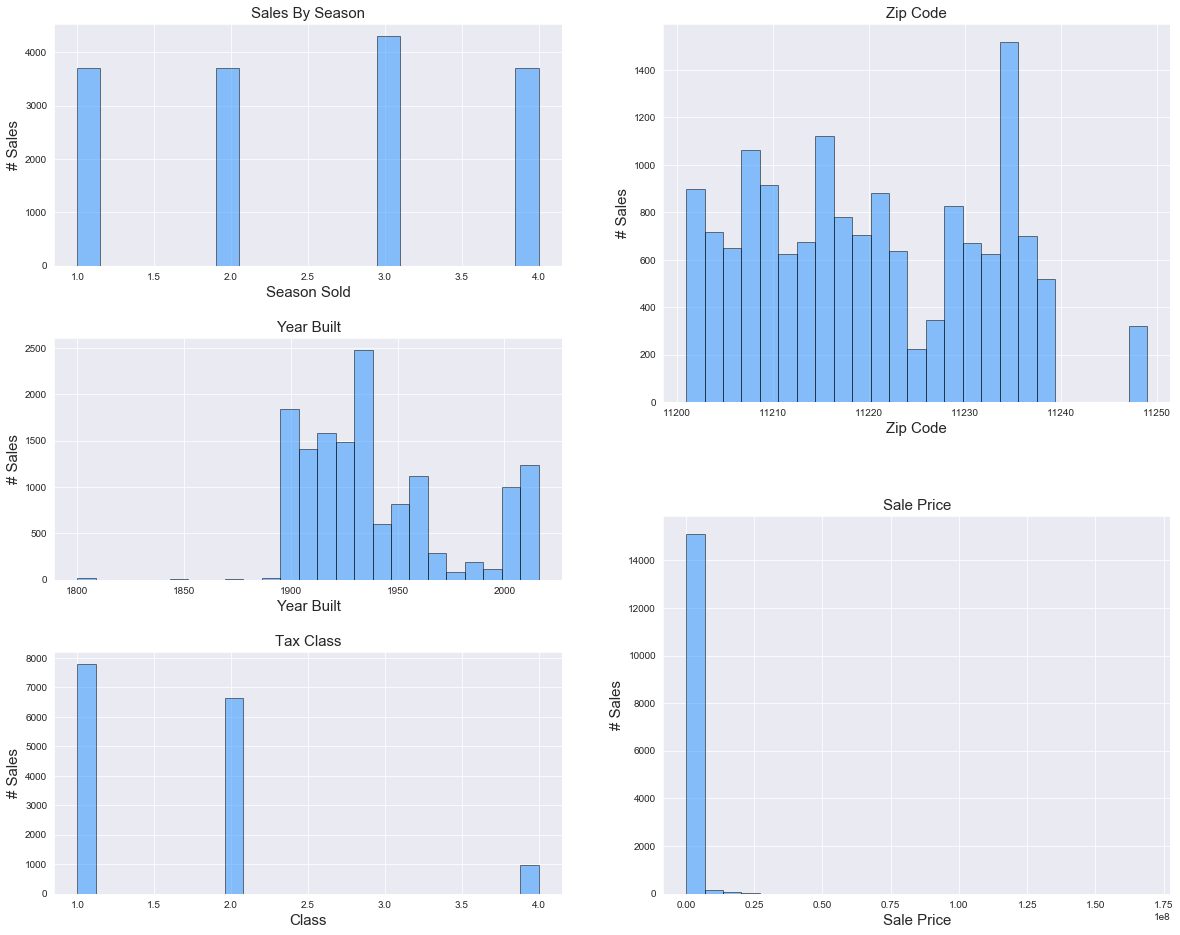

In [16]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax1 = fig.add_subplot(321)
ax1.hist(df['SALE_SEASON'], bins = 20, alpha = .50,edgecolor= 'black',color ='dodgerblue')
ax1.set_xlabel('Season Sold', fontsize = 15)
ax1.set_ylabel('# Sales',fontsize = 15)
ax1.set_title('Sales By Season',fontsize = 15)

ax2 = fig.add_subplot(323)
ax2.hist(df['YEAR_BUILT'], bins=25, alpha=0.5, edgecolor= 'black',color ='dodgerblue')
ax2.set_xlabel('Year Built', fontsize = 15)
ax2.set_ylabel('# Sales',fontsize = 15)
ax2.set_title('Year Built',fontsize = 15)

ax3 = fig.add_subplot(325)
ax3.hist(df['TAX_CLASS_AT_TIME_OF_SALE'], bins=25, alpha=0.5, edgecolor= 'black',color ='dodgerblue')
ax3.set_xlabel('Class', fontsize = 15)
ax3.set_ylabel('# Sales',fontsize = 15)
ax3.set_title('Tax Class',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(df['ZIP_CODE'], bins=25, alpha=0.5, edgecolor= 'black',color ='dodgerblue')
ax4.set_xlabel('Zip Code', fontsize = 15)
ax4.set_ylabel('# Sales',fontsize = 15)
ax4.set_title('Zip Code',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(df['SALE_PRICE'], bins=25, alpha=0.5, edgecolor= 'black',color ='dodgerblue')
ax5.set_xlabel('Sale Price', fontsize = 15)
ax5.set_ylabel('# Sales',fontsize = 15)
ax5.set_title('Sale Price',fontsize = 15);

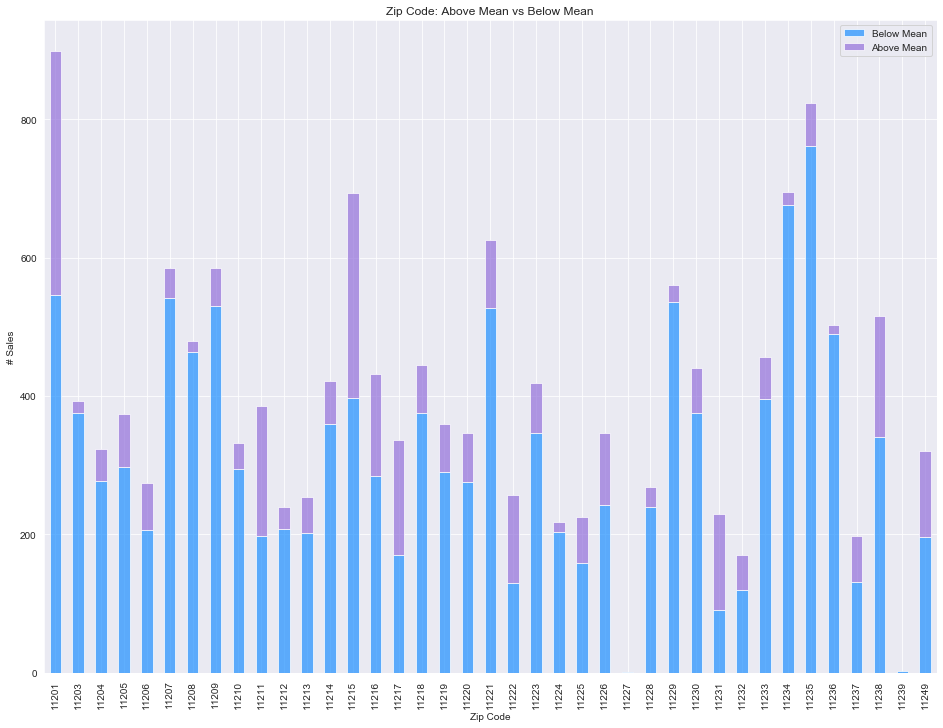

In [17]:
# zip code visualization - see if there is a difference by zip
zipcode = df.groupby(['ZIP_CODE','above_bk_mean']).ZIP_CODE.count().unstack()
p1 = zipcode.plot(kind = 'bar', stacked = True, 
                   title = 'Zip Code: Above Mean vs Below Mean', 
                   color = ['dodgerblue','mediumpurple'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Zip Code')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

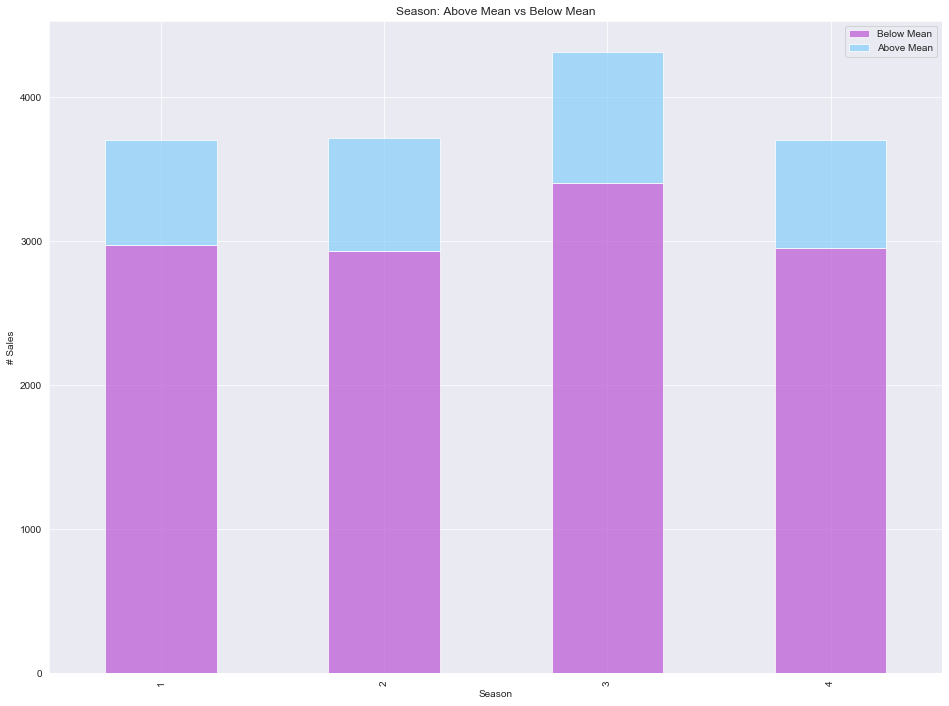

In [40]:
# season visualization
ssn = df.groupby(['SALE_SEASON','above_bk_mean']).SALE_SEASON.count().unstack()
p1 = ssn.plot(kind = 'bar', stacked = True, 
                   title = 'Season: Above Mean vs Below Mean', 
                   color = ['mediumorchid','lightskyblue'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Season')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

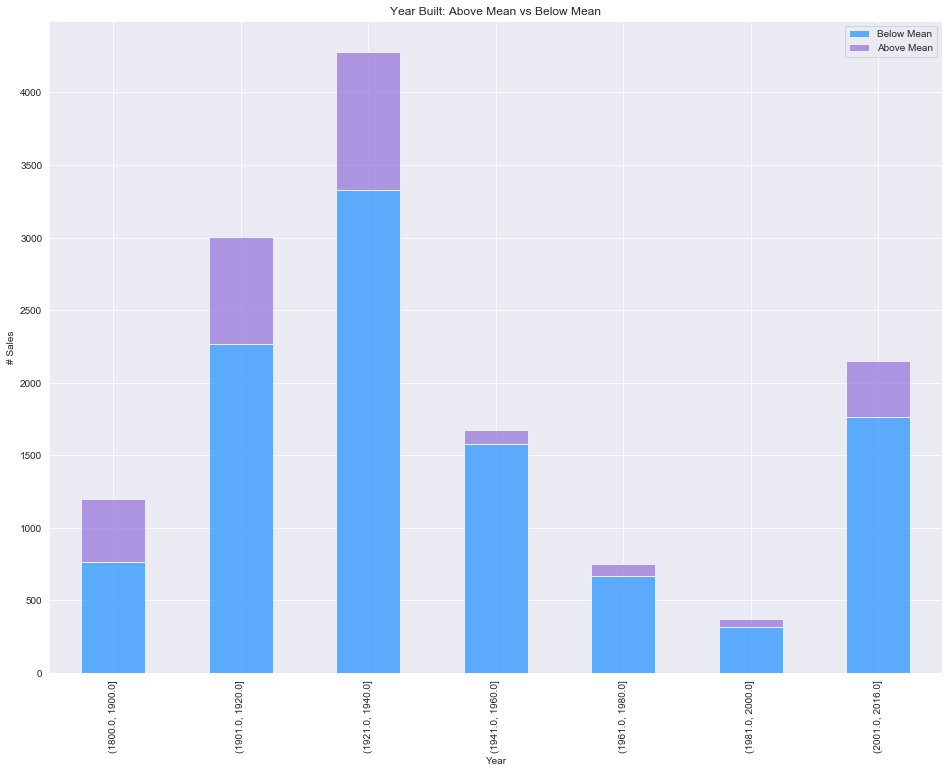

In [18]:
# year built visualization
yr = df.groupby(['year','above_bk_mean']).year.count().unstack()
p1 = yr.plot(kind = 'bar', stacked = True, 
                   title = 'Year Built: Above Mean vs Below Mean', 
                   color = ['dodgerblue','mediumpurple'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Year')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

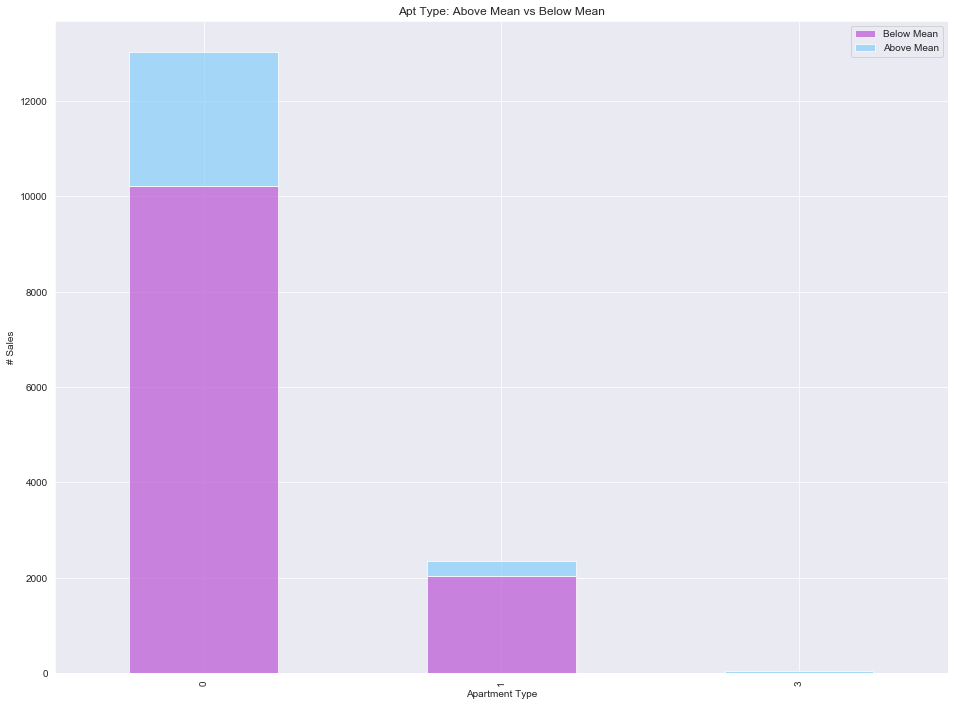

In [42]:
# apartment type visualization
apt = df.groupby(['APARTMENT_NUMBER','above_bk_mean']).APARTMENT_NUMBER.count().unstack()
p1 = apt.plot(kind = 'bar', stacked = True, 
                   title = 'Apt Type: Above Mean vs Below Mean', 
                   color = ['mediumorchid','lightskyblue'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Apartment Type')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

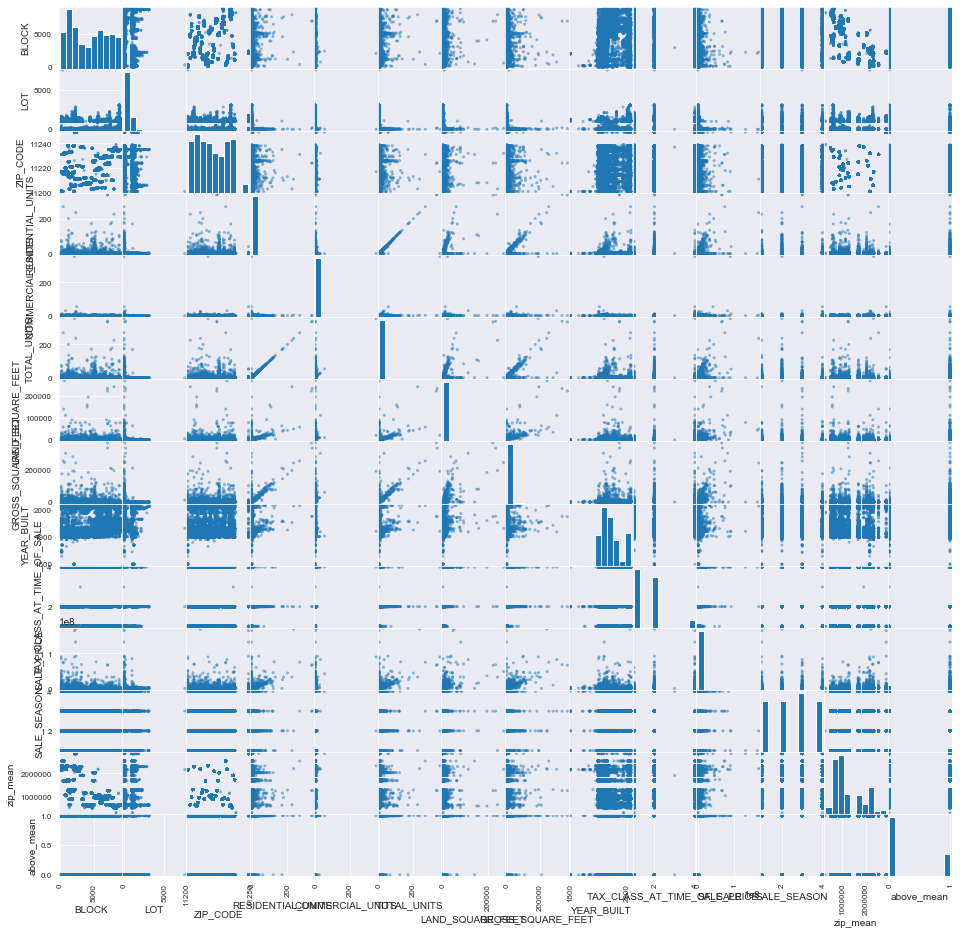

In [206]:
pd.plotting.scatter_matrix(df, figsize  = [16, 16]);
plt.show()

In [9]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS',
       'COMMERCIAL_UNITS', 'TOTAL_UNITS', 'LAND_SQUARE_FEET',
       'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TAX_CLASS_AT_TIME_OF_SALE',
       'BUILDING_CLASS_AT_TIME_OF_SALE', 'SALE_PRICE', 'SALE_DATE',
       'SALE_SEASON', 'zip_mean', 'above_mean', 'year'],
      dtype='object')

In [13]:
df.TAX_CLASS_AT_TIME_OF_SALE.unique()

array([1, 2, 4, 3])

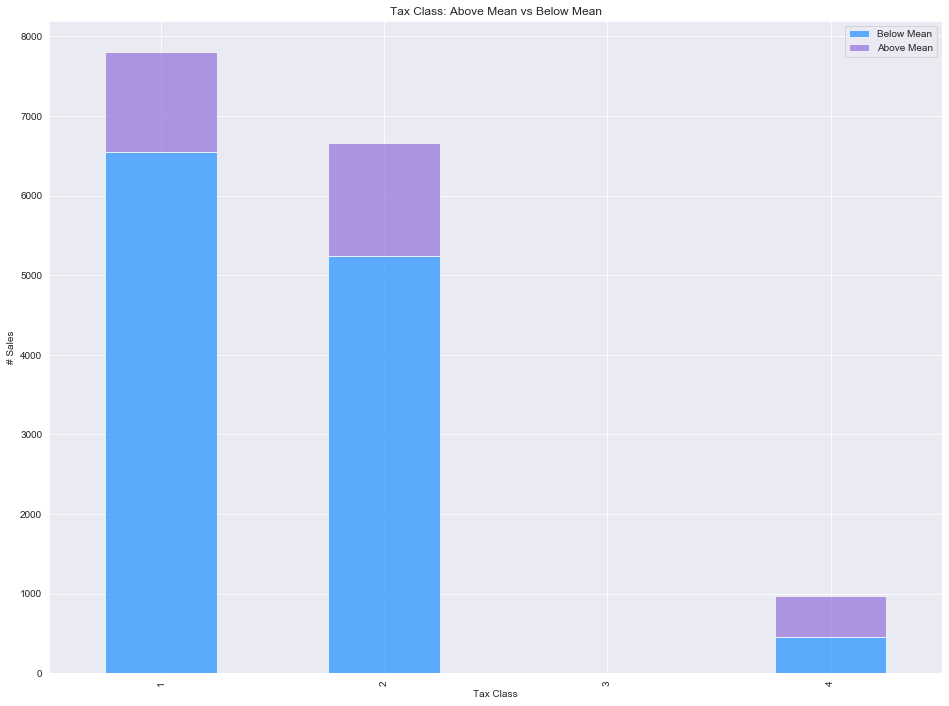

In [19]:
bldg = df.groupby(['TAX_CLASS_AT_TIME_OF_SALE','above_bk_mean']).TAX_CLASS_AT_TIME_OF_SALE.count().unstack()
p1 = bldg.plot(kind = 'bar', stacked = True, 
                   title = 'Tax Class: Above Mean vs Below Mean', 
                   color = ['dodgerblue','mediumpurple'], alpha = .70, figsize=(16,12))
p1.set_xlabel('Tax Class')
p1.set_ylabel('# Sales')
p1.legend(['Below Mean','Above Mean'])
plt.show()

In [ ]:
# categorical:'year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER'

outcome = ['above_mean']
predictors = ['year', 'SALE_SEASON', 'ZIP_CODE', 'APARTMENT_NUMBER','TAX_CLASS_AT_TIME_OF_SALE', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET']

In [44]:
df.to_csv('bk_data.csv')